In [1]:
import GPy
import numpy as np
from matplotlib import pyplot as plt


Name : GP regression
Objective : 201.57023800257025
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |    1.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        
Optimization restart 1/5, f = -127.09969004505625
Optimization restart 2/5, f = -127.0996900450604
Optimization restart 3/5, f = -127.09969004499351
Optimization restart 4/5, f = -127.09969004504174


reconstraining parameters GP_regression.Gaussian_noise.variance


Optimization restart 5/5, f = -127.09969004505332

Name : GP regression
Objective : -127.09869761231162
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                 value  |  constraints  |  priors
  rbf.variance             |                   1.0  |      +ve      |        
  rbf.lengthscale          |    1.2097819121727973  |      +ve      |        
  Gaussian_noise.variance  |  0.011556606403916033  |      +ve      |        

Name : GP regression
Objective : -10.855142222059271
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                 value  |  constraints  |  priors
  rbf.variance             |                   2.0  |      +ve      |        
  rbf.lengthscale          |                   2.0  |      +ve      |        
  Gaussian_noise.variance  |  0.011556606403916033  |      +ve      |        

Name : GP regression
Objective : -3.9

 /home/engs2258/miniconda3/envs/lab2Env2023/lib/python3.9/site-packages/GPy/plotting/matplot_dep/priors_plots.py:14: MatplotlibDeprecationWarning:
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
 /home/engs2258/miniconda3/envs/lab2Env2023/lib/python3.9/site-packages/GPy/core/parameterization/priors.py:179: RuntimeWarning:invalid value encountered in log
 /home/engs2258/miniconda3/envs/lab2Env2023/lib/python3.9/site-packages/GPy/core/parameterization/priors.py:319: RuntimeWarning:invalid value encountered in log
reconstraining parameters GP_regression.rbf.lengthscale



Name : GP regression
Objective : -120.82922072641121
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                 value  |  constraints  |    priors  
  rbf.variance             |   0.44471848945096937  |               |            
  rbf.lengthscale          |    0.9949528159379418  |               |  Ga(2, 0.1)
  Gaussian_noise.variance  |  0.012176629293602087  |               |            

Name : gp
Objective : -127.09969004505454
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  gp.                      |                value  |  constraints  |  priors
  rbf.variance             |   0.9823320513646734  |      +ve      |        
  rbf.lengthscale          |   1.2097821305803986  |      +ve      |        
  Gaussian_noise.variance  |  0.01155660545954839  |      +ve      |        


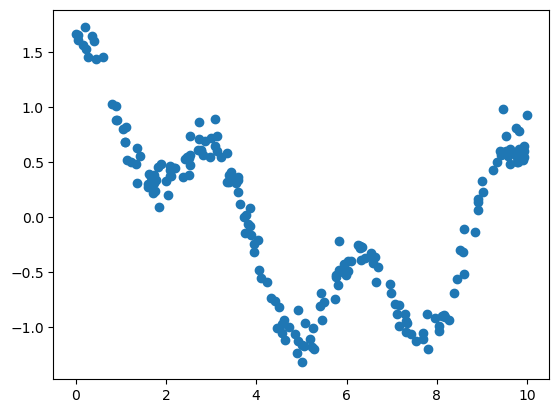

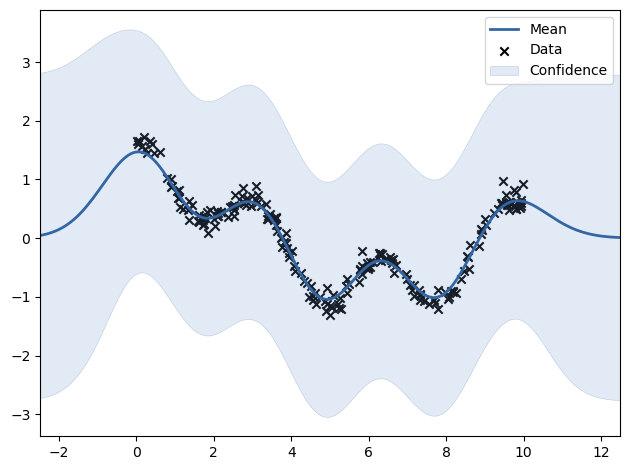

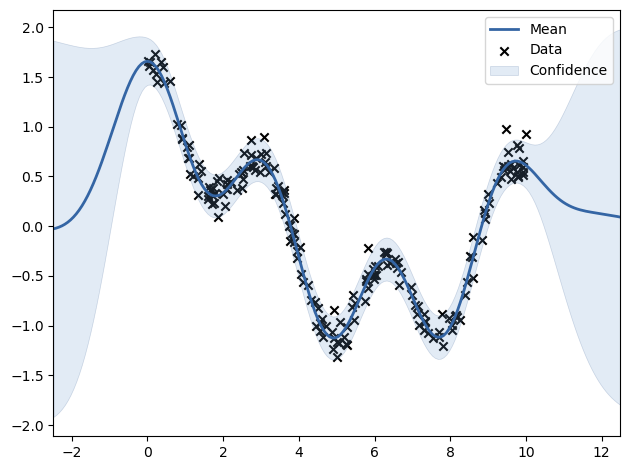

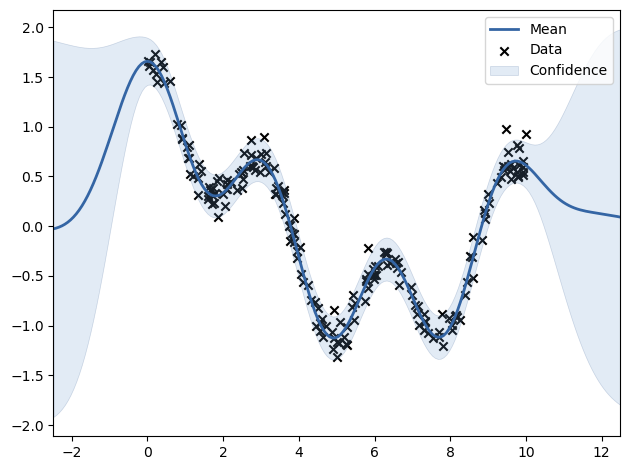

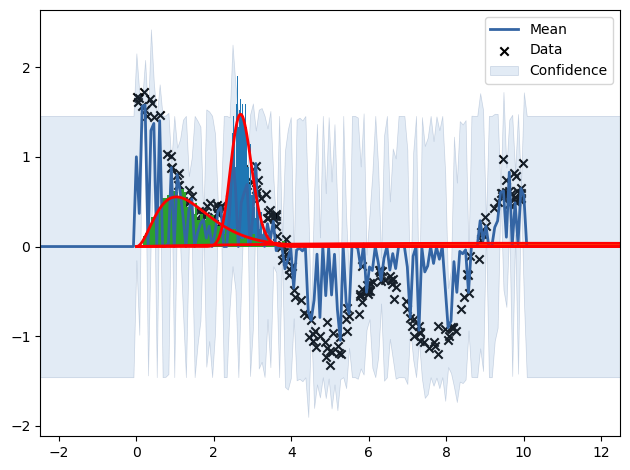

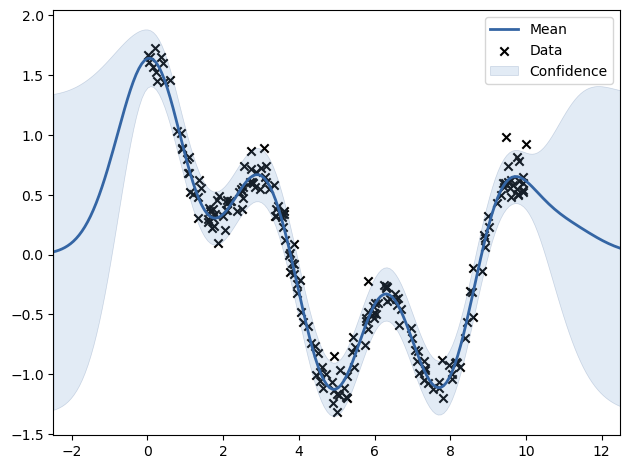

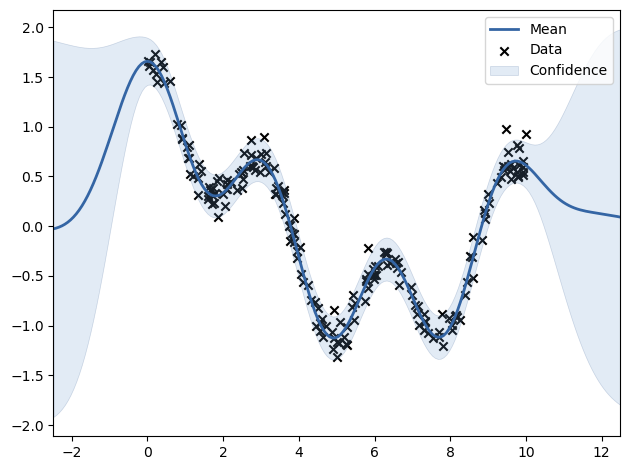

In [2]:
np.random.seed(100)
X = np.random.uniform(0, 10, (200, 1))
f = np.cos(.5*X) + .5*np.cos(2.*X)
f -= f.mean() # equivalent to f = f - f.mean()
Y = f+np.random.normal(0, .1, f.shape)
plt.scatter(X, Y)

# construct a simple regression fitting with RBF kernel (default)
m = GPy.models.GPRegression(X, Y)

# print details of the model 
print(m)

# plot the current model
m.plot()

# optimise the hyper-parameters
m.optimize()
# optimise hyperparameters x times to get a good estimate 
m.optimize_restarts(5, robust=True)

# plot the optimised model
m.plot()

# compute hyper-parameter values
m.rbf.lengthscale

# change hyper-parameter values
m.rbf.variance = 1. # set to a fixed value
print(m)
m.rbf[:] = 2. # set to a fixed value
print(m)
m.Gaussian_noise.variance = 0.01 # set to a fixed value
print(m)
m.Gaussian_noise.variance.constrain_bounded(0.001,0.1)  # set to a range of values
print(m)

# fix a parameter value
m = GPy.models.GPRegression(X, Y)
m.optimize()
m.plot()
print(m)
m.Gaussian_noise[:] = 0.0001
m.Gaussian_noise.fix()
m.optimize()
m.plot()
print(m)



# constraint hyperparameters using a prior
# link: https://gpy.readthedocs.io/en/deploy/_modules/GPy/core/parameterization/priors.html
np.random.seed(0)
lognormal_prior = GPy.priors.LogGaussian(1,0.1) # mean = np.exp(u+sigma**2/2)
lognormal_prior.plot()
gamma_prior1 = GPy.priors.Gamma(2, 0.1) # mean = a*(1/b)
gamma_prior1.plot()
gamma_prior2 = GPy.priors.Gamma.from_EV(1.5, 0.7) # a = np.square(E) / V b = E / V
gamma_prior2.plot()

m.rbf.lengthscale.set_prior(gamma_prior1)
m.unconstrain()
m.optimize()
m.plot()
print(m)

# using the core GP model 
rbf_kern = GPy.kern.RBF(input_dim=1, lengthscale=1.0, variance=1.0)
gauss = GPy.likelihoods.Gaussian(variance=1.0)
exact = GPy.inference.latent_function_inference.ExactGaussianInference()
m_exact = GPy.core.GP(X=X, Y=Y, kernel=rbf_kern, likelihood=gauss, inference_method=exact)
m_exact.optimize()
m_exact.plot()
print(m_exact)

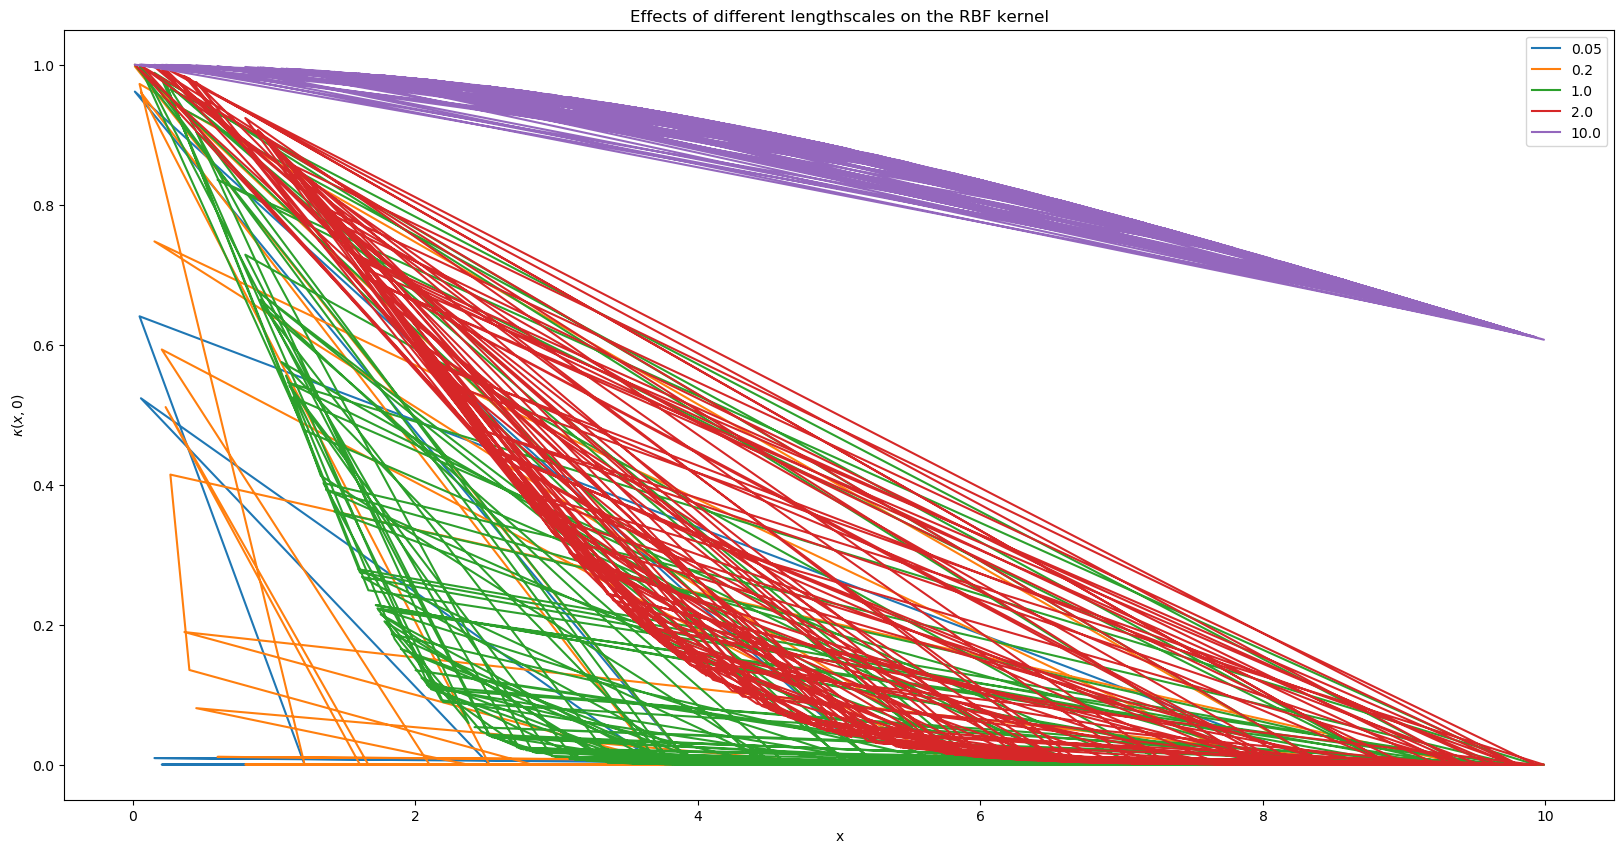

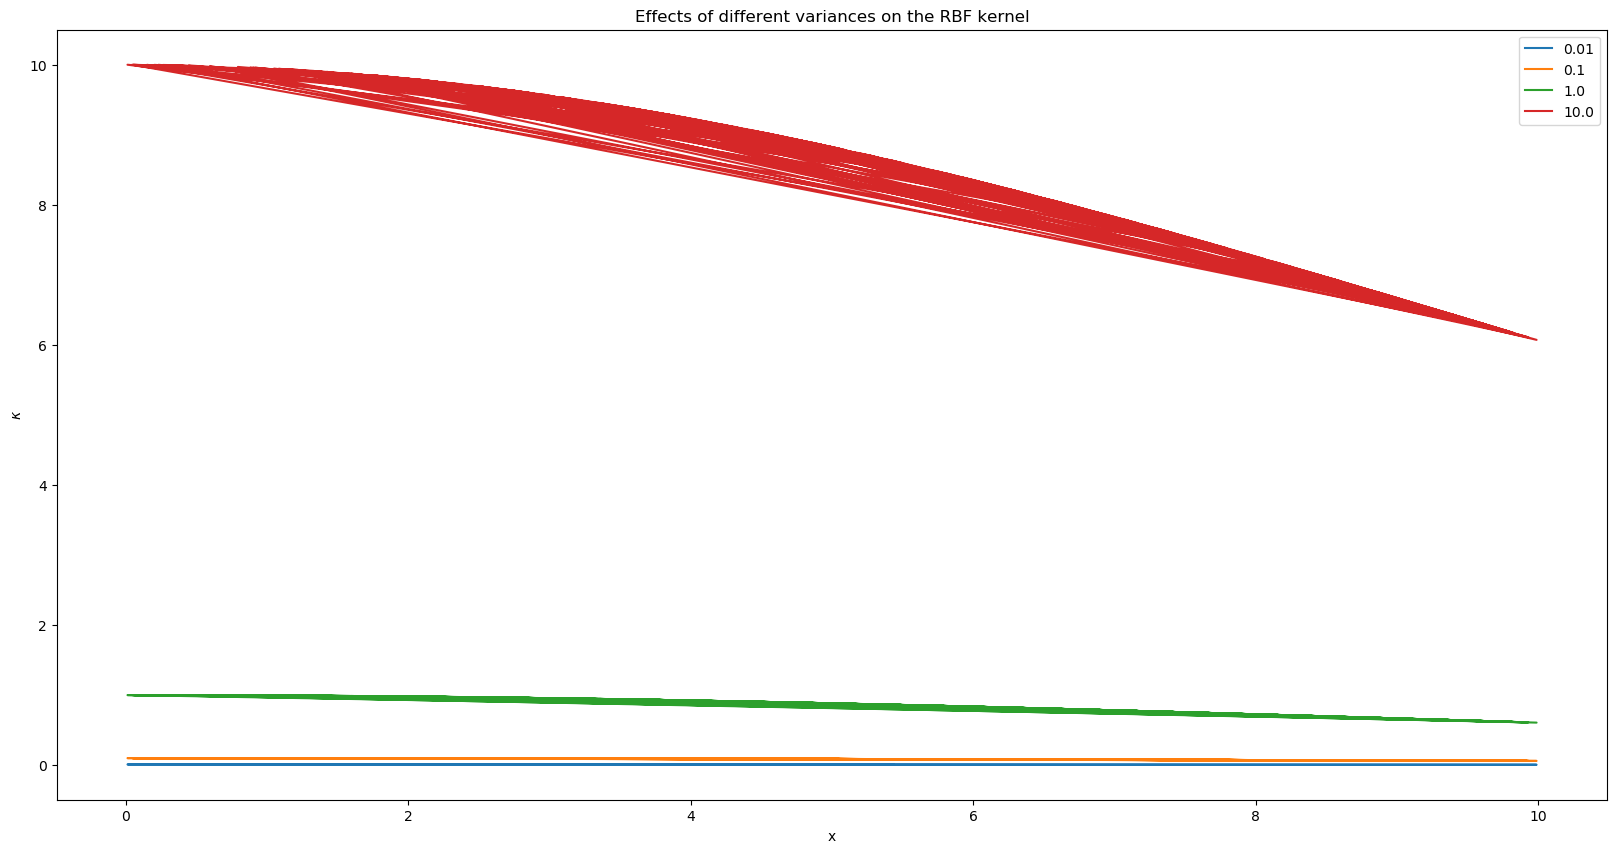

In [3]:
k = GPy.kern.RBF(1)

# a list of different lengthscales
ls = [0.05, 0.2, 1., 2., 10.]

plt.figure(figsize=(20, 10))

for l in ls:
    # Set the lengthscale to be l
    k.lengthscale = l
    C = k.K(X, np.array([[0.]]))
    plt.plot(X,C)

plt.xlabel("x"), plt.ylabel("$\kappa(x,0)$") 
plt.title("Effects of different lengthscales on the RBF kernel")
plt.legend(labels=ls)
# Note: the length-scale 𝑙 determines the length of the 'wiggles' in the GP 
# function; nearby samples from the corresponding Gaussian process will be more 
# likely to be similar as the lengthscale increased.

# a list of different variances
vs = [0.01, 0.1, 1., 10.]

plt.figure(figsize=(20, 10))

for v in vs:
    # Set the variance parameter of the kernel
    k.variance = v
    C = k.K(X, np.array([[0.]]))
    plt.plot(X,C)

plt.xlabel("x"), plt.ylabel("$\kappa$") 
plt.title("Effects of different variances on the RBF kernel")
plt.legend(labels=vs);
# Note: the variance 𝜎**2 determines the average distance of the GP function 
# away from its mean; increasing the variance parameter allowing for modelling 
# of data with different variance.

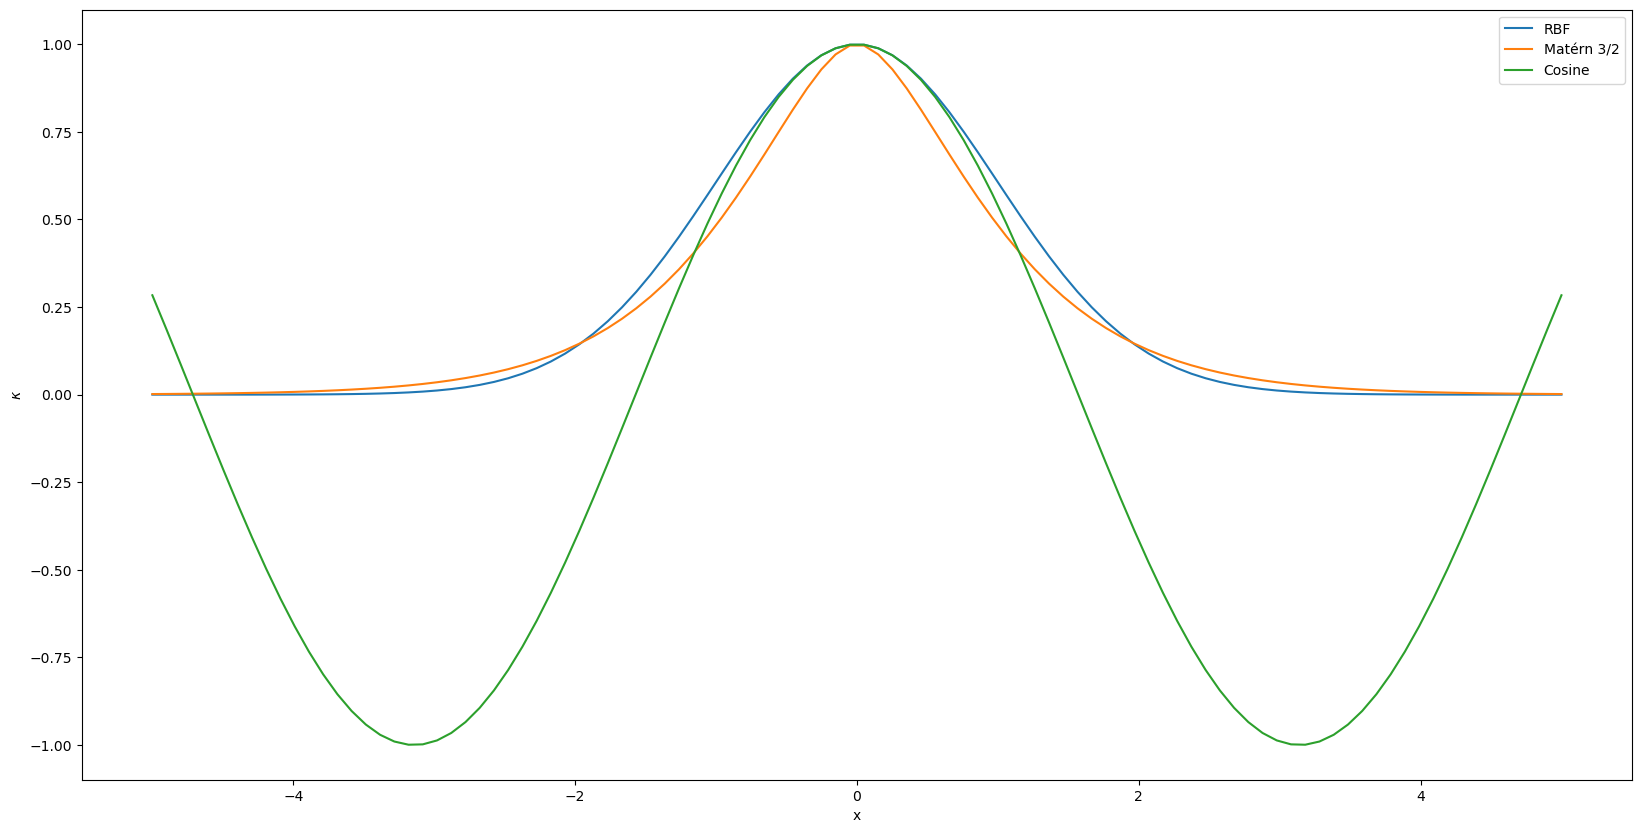

In [4]:
X = np.linspace(-5.,5.,100)[:, None]
# RBF kernel
k_RBF = GPy.kern.RBF(1)
C_RBF = k_RBF.K(X, np.array([[0.]]))

# Matern 3/2
k_Matern32 = GPy.kern.Matern32(1)
C_Matern32 = k_Matern32.K(X, np.array([[0.]]))

# Cosine 
k_Cosine = GPy.kern.Cosine(1)
C_Cosine = k_Cosine.K(X, np.array([[0.]]))

plt.figure(figsize=(20,10))
plt.plot(X, C_RBF, X, C_Matern32, X, C_Cosine);
plt.xlabel("x"), plt.ylabel("$\kappa$") 
plt.legend(labels=["RBF", "Matérn 3/2", "Cosine"])

  sum.                  |  value  |  constraints  |  priors
  RBF.variance          |    1.0  |      +ve      |        
  RBF.lengthscale       |    2.0  |      +ve      |        
  Matern52.variance     |    2.0  |      +ve      |        
  Matern52.lengthscale  |    2.0  |      +ve      |        

Name : GP regression
Objective : -121.85779742606152
Number of Parameters : 5
Number of Optimization Parameters : 5
Updates : True
Parameters:
  GP_regression.            |                  value  |  constraints  |  priors
  sum.RBF.variance          |  5.882781028633991e-07  |      +ve      |        
  sum.RBF.lengthscale       |      6.614921422056122  |      +ve      |        
  sum.Matern52.variance     |     1.0625040514280149  |      +ve      |        
  sum.Matern52.lengthscale  |     1.8065379618775805  |      +ve      |        
  Gaussian_noise.variance   |   0.011512358891688074  |      +ve      |        


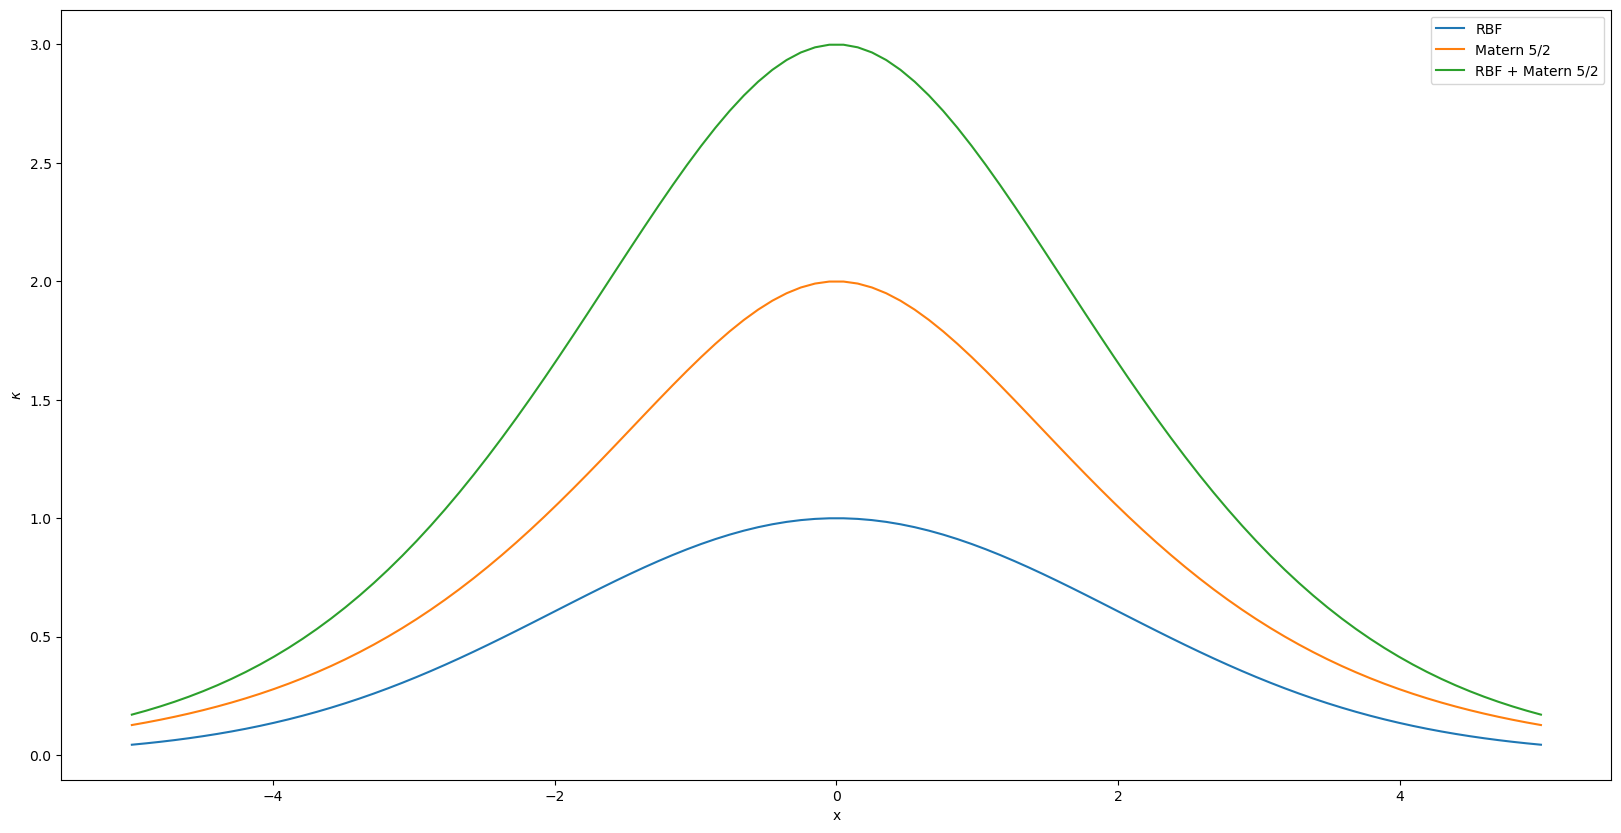

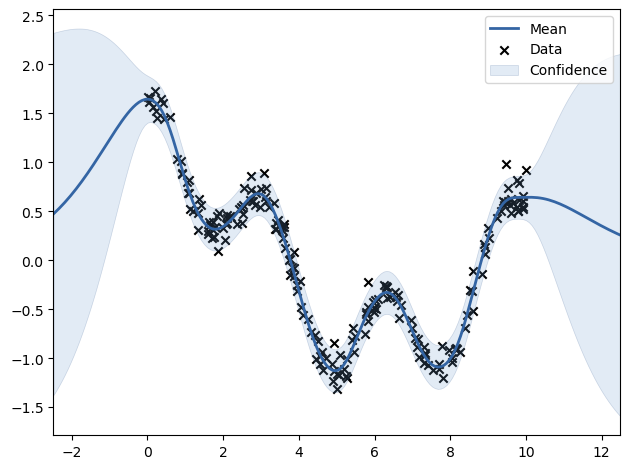

In [5]:
kern_RBF = GPy.kern.RBF(1, variance=1., lengthscale=2., name="RBF")
kern_Matern52 = GPy.kern.Matern52(1, variance=2., lengthscale=2., name="Matern52")
kern_sum = kern_RBF + kern_Matern52
print (kern_sum)

# generate 100 samples in the interval [-5,5] 
X = np.linspace(-5.,5.,100)[:, None]
# sample from the kernals k(x,0)
K_RBF = kern_RBF.K(X, np.array([[0.]]))    # RBF
K_Matern52 = kern_Matern52.K(X, np.array([[0.]]))    # Matern 5/2
K_sum = kern_sum.K(X, np.array([[0.]]))  # RBF + Matern

# Plot covariance k(x,0)
plt.figure(figsize=(20, 10))
plt.plot(X, K_RBF, X, K_Matern52, X, K_sum)
plt.xlabel("x"), plt.ylabel("$\kappa$")
plt.legend(labels=["RBF", "Matern 5/2", "RBF + Matern 5/2"]);

# generating raw data
np.random.seed(100)
X_data = np.random.uniform(0, 10, (200, 1))
f = np.cos(.5*X_data) + .5*np.cos(2.*X_data)
f -= f.mean() # equivalent to f = f - f.mean()
Y = f+np.random.normal(0, .1, f.shape)
# construct a simple regression fitting with RBF kernel (default)
m = GPy.models.GPRegression(X=X_data, Y=Y, kernel=kern_sum)
m.optimize()
m.plot()
print(m)

  mul.                  |  value  |  constraints  |  priors
  RBF.variance          |    1.0  |      +ve      |        
  RBF.lengthscale       |    2.0  |      +ve      |        
  Matern52.variance     |    2.0  |      +ve      |        
  Matern52.lengthscale  |    2.0  |      +ve      |        

Name : GP regression
Objective : -127.0996887372014
Number of Parameters : 5
Number of Optimization Parameters : 5
Updates : True
Parameters:
  GP_regression.            |                 value  |  constraints  |  priors
  mul.RBF.variance          |    0.6537228996328025  |      +ve      |        
  mul.RBF.lengthscale       |     1.209874627542655  |      +ve      |        
  mul.Matern52.variance     |    1.5026284366363523  |      +ve      |        
  mul.Matern52.lengthscale  |    104.56246533658405  |      +ve      |        
  Gaussian_noise.variance   |  0.011556633561658359  |      +ve      |        


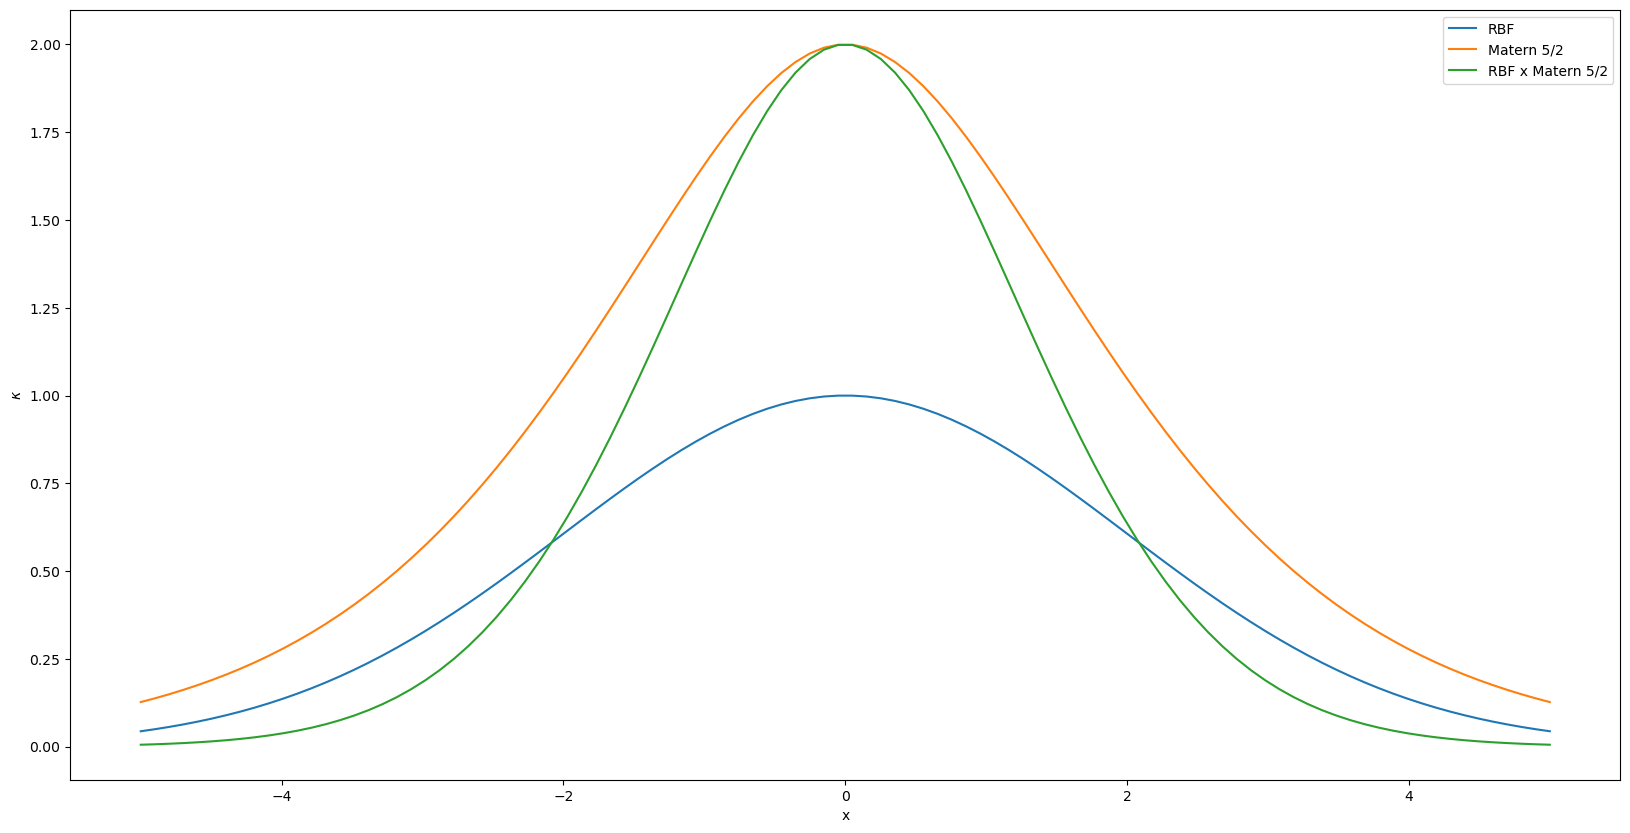

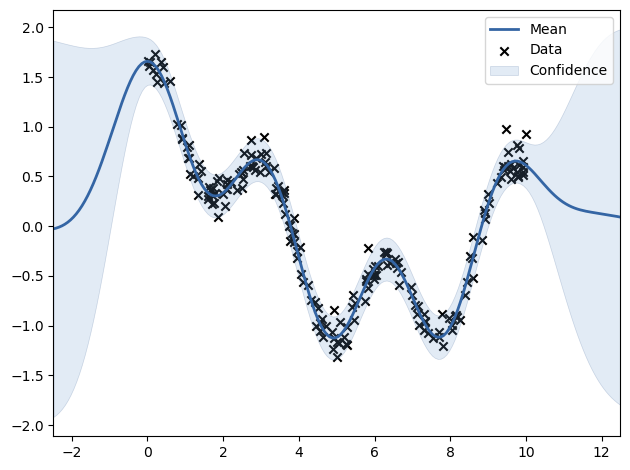

In [6]:
kern_RBF = GPy.kern.RBF(1, variance=1., lengthscale=2., name="RBF")
kern_Matern52 = GPy.kern.Matern52(1, variance=2., lengthscale=2., name="Matern52")
kern_multiplication = kern_RBF * kern_Matern52
print (kern_multiplication)

# generate 100 samples in the interval [-5,5] 
X = np.linspace(-5.,5.,100)[:, None]
# sample from the kernals k(x,0)
K_RBF = kern_RBF.K(X, np.array([[0.]]))    # RBF
K_Matern52 = kern_Matern52.K(X, np.array([[0.]]))    # Matern 5/2
K_multiply = kern_multiplication.K(X, np.array([[0.]]))  # RBF * Matern

# Plot covariance k(x,0)
plt.figure(figsize=(20, 10))
plt.plot(X, K_RBF, X, K_Matern52, X, K_multiply)
plt.xlabel("x"), plt.ylabel("$\kappa$")
plt.legend(labels=["RBF", "Matern 5/2", "RBF x Matern 5/2"]);

# generating raw data
np.random.seed(100)
X_data = np.random.uniform(0, 10, (200, 1))
f = np.cos(.5*X_data) + .5*np.cos(2.*X_data)
f -= f.mean() # equivalent to f = f - f.mean()
Y = f+np.random.normal(0, .1, f.shape)
# construct a simple regression fitting with RBF kernel (default)
m = GPy.models.GPRegression(X=X_data, Y=Y, kernel=kern_multiplication)
m.optimize()
m.plot()
print(m)


reconstraining parameters GP_regression.sum.RBF.variance



Name : GP regression
Objective : -121.95031512992
Number of Parameters : 5
Number of Optimization Parameters : 5
Updates : True
Parameters:
  GP_regression.            |                  value  |  constraints  |  priors
  sum.RBF.variance          |  0.0010616613668652018  |   0.001,0.1   |        
  sum.RBF.lengthscale       |      5.484355523237358  |      +ve      |        
  sum.Matern52.variance     |     1.0194501598623231  |      +ve      |        
  sum.Matern52.lengthscale  |     1.7866666442679013  |      +ve      |        
  Gaussian_noise.variance   |   0.011510697988094277  |      +ve      |        


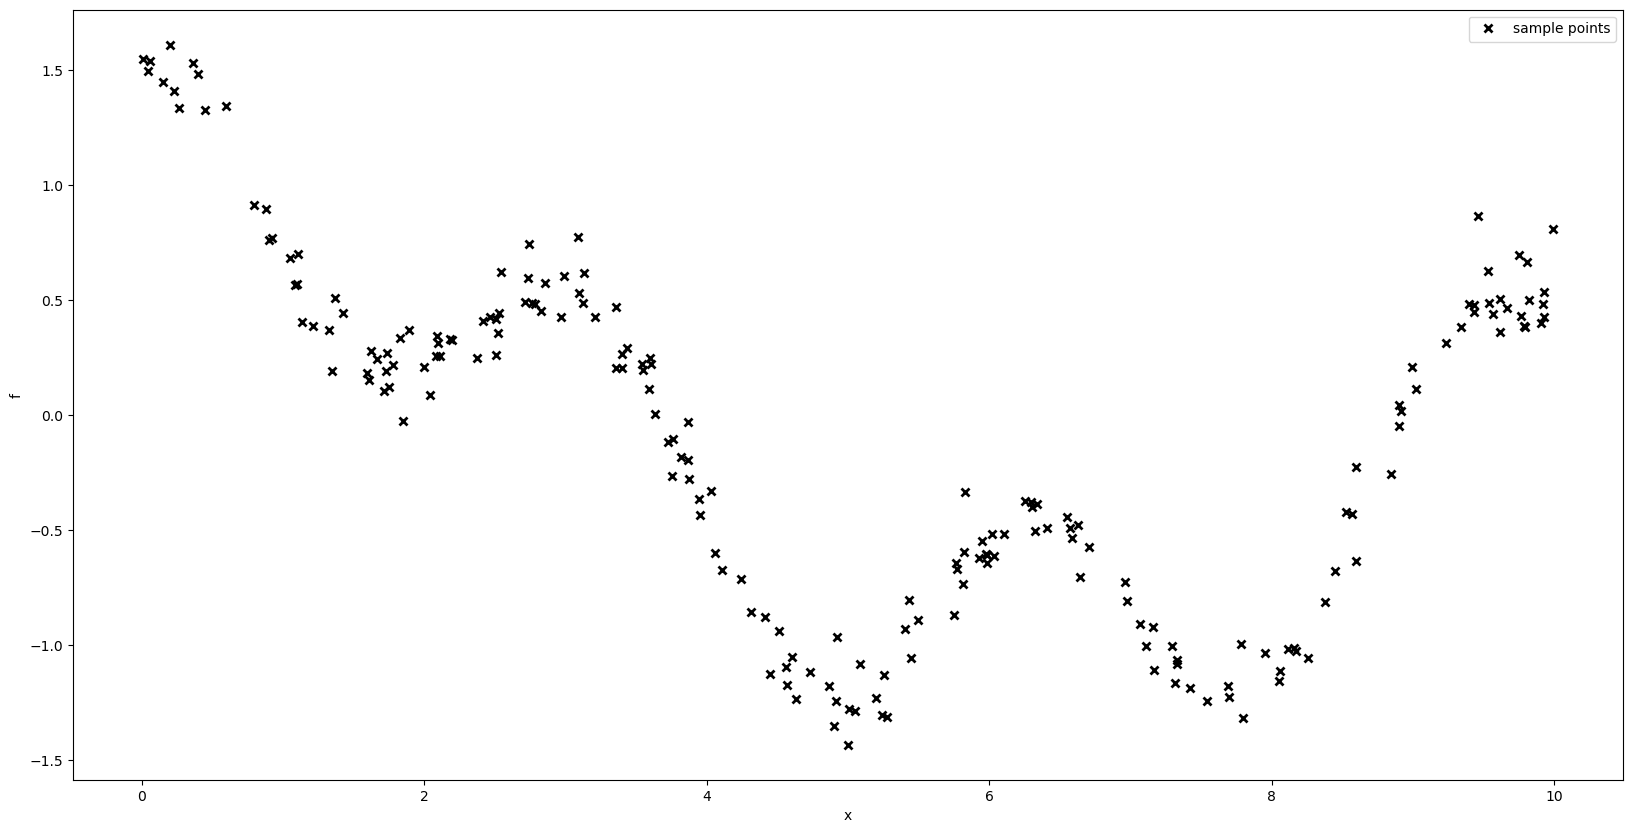

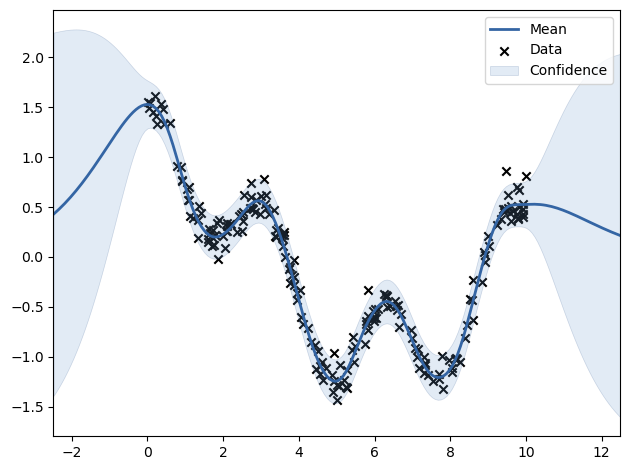

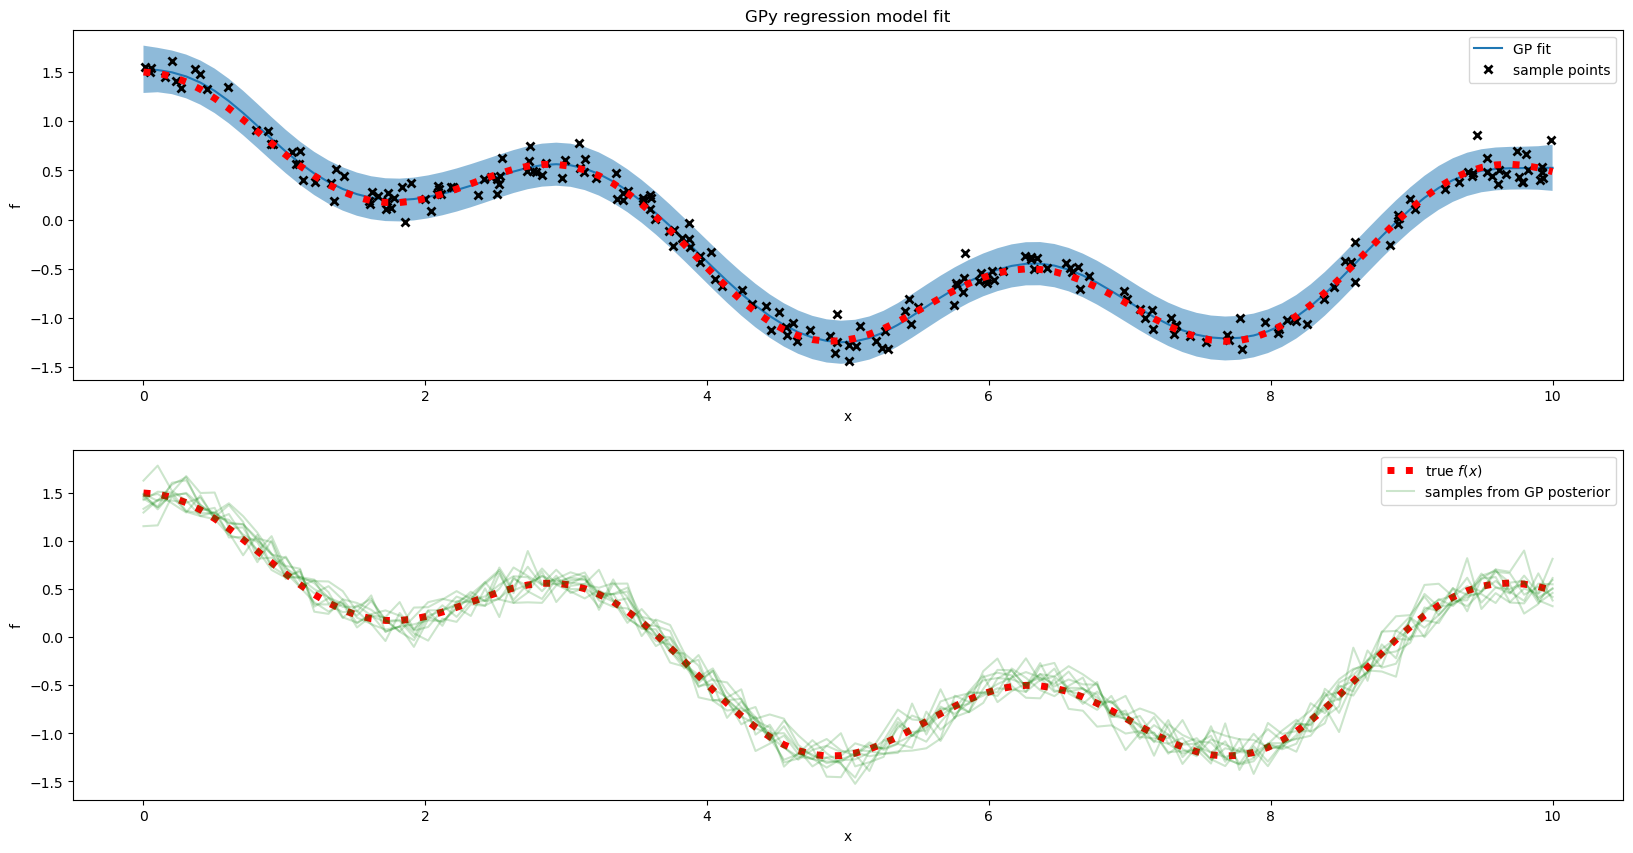

In [7]:
def plot_gp(X, m, C, training_points=None):
    """ Plotting utility to plot a GP fit with 95% confidence interval """
    # Plot 95% confidence interval 
    plt.fill_between(X[:,0],
                     m[:,0] - 1.96*np.sqrt(np.diag(C)),
                     m[:,0] + 1.96*np.sqrt(np.diag(C)),
                     alpha=0.5)
    # Plot GP mean and initial training points
    plt.plot(X, m, "-")
    plt.legend(labels=["GP fit"])
    plt.xlabel("x"), plt.ylabel("f")
    
    # Plot training points if included
    if training_points is not None:
        X_, Y_ = training_points
        plt.plot(X_, Y_, "kx", mew=2)
        plt.legend(labels=["GP fit", "sample points"])


# lambda function, call f(x) to generate data
f = lambda x: np.cos(.5*x) + .5*np.cos(2.*x)   

# generating raw data      
np.random.seed(100)
X_data = np.random.uniform(0, 10, (200, 1))
#f(X) -= f(X).mean() # equivalent to f = f - f.mean()
Y = f(X_data) + np.random.normal(0, .1, f(X_data).shape)
plt.figure(figsize=(20, 10))
plt.plot(X_data, Y, "kx", mew=2)
plt.xlabel("x"), plt.ylabel("f")
plt.legend(labels=["sample points"]);


# construct a simple regression fitting with RBF + matern52  kernels
kern_RBF = GPy.kern.RBF(1, variance=1., lengthscale=2., name="RBF")
kern_Matern52 = GPy.kern.Matern52(1, variance=2., lengthscale=2., name="Matern52")
kern_sum = kern_RBF + kern_Matern52
m = GPy.models.GPRegression(X=X_data, Y=Y, kernel=kern_sum)
m.sum.RBF.variance.constrain_bounded(0.001,0.1)  # set to a range of values
m.optimize()
m.plot()
print(m)

# New test points to sample function from
np.random.seed(100)
X_new = np.linspace(0, 10, 100)[:, None]


# predict the mean and covaraince usign new data points Xnew
mean, Cov = m.predict(X_new, full_cov=True)

plt.figure(figsize=(20, 10))
plt.subplot(211)
# Plot the GP fit mean and covariance
plot_gp(X_new, mean, Cov, training_points=(X_data,Y))
plt.plot(X_new, f(X_new),"r:",lw=5)
plt.title("GPy regression model fit");

# sample from posterior
Z  = np.random.multivariate_normal(mean[:,0], Cov, 10)
plt.subplot(212)
plt.plot(X_new, f(X_new),"r:",lw=5)
for z in Z:
    plt.plot(X_new,z, "g-", alpha=0.2)   
plt.xlabel("x"), plt.ylabel("f")
plt.legend(labels=["true $f(x)$", "samples from GP posterior"]);

